Best solution found:  [0.09641446]
Fitness of the best solution:  0.009295748613404802


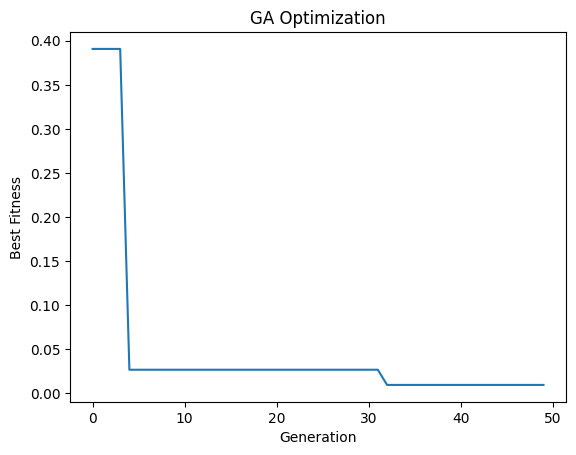

In [5]:
import numpy as np

# Define the fitness function
def fitness_function(x):
    return x**2

# Generate initial population
def generate_population(size, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, (size, 1))

# Select parents for crossover
def select_parents(population, fitness, num_parents):
    selected_parents = np.argsort(fitness, axis=0)[:num_parents].flatten()
    return population[selected_parents]

# Crossover operation
def crossover(parents, offspring_size):
    offspring = np.zeros(offspring_size)
    crossover_point = offspring_size[1] // 2
    
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, :crossover_point] = parents[parent1_idx, :crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    
    return offspring

# Mutation operation
def mutate(offspring, mutation_rate):
    for idx in range(offspring.shape[0]):
        if np.random.rand() < mutation_rate:
            random_value = np.random.uniform(-1.0, 1.0, 1)
            offspring[idx] += random_value
    return offspring

# Genetic Algorithm
def genetic_algorithm(population_size, num_generations, num_parents, mutation_rate, lower_bound, upper_bound):
    population = generate_population(population_size, lower_bound, upper_bound)
    best_outputs = []
    
    for generation in range(num_generations):
        fitness = fitness_function(population)
        best_outputs.append(np.min(fitness))
        parents = select_parents(population, fitness, num_parents)
        offspring_size = (population_size - parents.shape[0], population.shape[1])
        
        if offspring_size[0] > 0:
            offspring = crossover(parents, offspring_size)
            offspring = mutate(offspring, mutation_rate)
            population[:parents.shape[0]] = parents
            population[parents.shape[0]:] = offspring
        else:
            break
    
    return best_outputs, population

# Parameters
population_size = 10
num_generations = 50
num_parents = 4
mutation_rate = 0.1
lower_bound = -10
upper_bound = 10

best_outputs, final_population = genetic_algorithm(
    population_size, num_generations, num_parents, mutation_rate, lower_bound, upper_bound
)

# Results
best_individual = final_population[np.argmin(fitness_function(final_population))]
best_fitness = np.min(fitness_function(final_population))

print("Best solution found: ", best_individual)
print("Fitness of the best solution: ", best_fitness)

import matplotlib.pyplot as plt

plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("GA Optimization")
plt.show()
